# Section 4.Neural Network Modeling

### _Objective_
1. Deep Neural Network 을 Tensorflow 을 이용해 구현합니다. 


In [0]:
%matplotlib inline

import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

## 문제 1. 그래프 근사시키기
* Tensorflow 을 이용해 아래의 그래프를 근사화 해 보세요.<br>

$$
f(x) = \frac{x}{2} * (sin(32x+0.5) * cos(24x-0.5) + sin(-3x+0.3))
$$

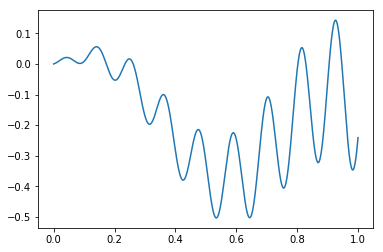

In [25]:
# 우선 실행해 주세요
func = lambda x : x*(np.sin(32*x+0.5)*np.cos(24*x-0.5)+np.sin(-3*x+0.3))/2

xs = np.linspace(0,1,1000)
ys = func(xs)

plt.plot(xs,ys)
plt.show()

In [26]:
#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* `graph` 아래에 Node들을 구성해 주세요.
* 주요 Node의 이름은 아래로 통일시켜 주세요.
    * 입력 노드 : `x`, shape = (None,1)
    * y label 노드 : `y_true`, shape = (None,1)
    * 출력 노드 : `y_pred`, shape = (None, 1)


SyntaxError: ignored

In [0]:
graph = tf.Graph()
with graph.as_default():
    # Graph 구성하기
    x = tf.placeholder(tf.float32, shape=(None,1), name='x')
    y_true = tf.placeholder(tf.float32, shape=(None,1), name="y_true")

    # TODO
    # 원하는 형태로 모델을 작성해 주세요.
    # 아래의 코드를 실행시켰을 때, RMSE가 0.01미만으로 나오도록 학습시켜 주세요
    h1=tf.layers.Dense(units = 10, activation = tf.nn.relu, name = "h1")(x)
    h2=tf.layers.Dense(units = 50, activation = tf.nn.relu, name = "h2")(h1)
    h3=tf.layers.Dense(units = 100, activation = tf.nn.relu, name = "h3")(h2)
    h4=tf.layers.Dense(units = 50, activation = tf.nn.relu, name = "h4")(h3)
    h5=tf.layers.Dense(units = 10, activation = tf.nn.relu, name = "h5")(h4)
    y_pred=tf.layers.Dense(units = 1, name = "h1")(h4)
    y_pred = tf.identity(y_pred,name="y_pred")
    
    loss = tf.reduce_mean((y_pred - y_true)**2, axis = 0)
    
    train = tf.train.AdamOptimizer(0.01).minimize(loss)
    
    #Unit수가 너무 많으면 데이터 부족으로 w의 학습이 안될 수 있다.
    

#### 아래의 코드로 학습시켜 주세요 . 

In [28]:
# 모델은 아래와 같이 학습시킬 수 있습니다.
# 총 20000 Epoch을 학습시키도록 하겠습니다.
with graph.as_default():
    # 필요 노드 가져오기
    x = graph.get_tensor_by_name('x:0')
    y_true = graph.get_tensor_by_name('y_true:0')
    y_pred = graph.get_tensor_by_name('y_pred:0')

    train_op = graph.get_collection(tf.GraphKeys.TRAIN_OP)[0]

    sess = tf.Session(graph=graph)
    sess.run(tf.global_variables_initializer())

    for epoch in tqdm(range(20000)):
         sess.run(train_op,feed_dict={
             x:xs.reshape(-1,1),
             y_true:ys.reshape(-1,1)})

100%|██████████| 20000/20000 [00:31<00:00, 641.76it/s]


#### 정답 확인
* 아래와 동일하게 나오는지 확인해 주세요
* 학습시킨 모델이 아래의 기준지표(RMSE<0.01)이 될 수 있도록 학습시켜주세요

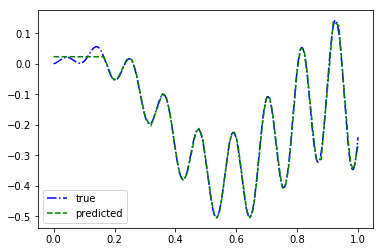

정답입니다.


In [29]:
ys_pred = sess.run(y_pred,feed_dict={
    x: xs.reshape(-1,1)
})

plt.plot(xs, ys, 'b-.')
plt.plot(xs, ys_pred, 'g--')
plt.legend(['true','predicted'])
plt.show()

rmse = np.sqrt(np.mean((ys_pred-ys.reshape(-1,1))**2))
assert rmse < 0.01, "root-mean-squared-error값이 0.01미만으로 나오도록 해주세요"
print("정답입니다.")

#  

<hr>
<div style = "background-image: url('https://algorithmai.io/static/media/logo.665798c4.png');background-repeat: no-repeat; background-position: right; background-size: 220px 40px; padding : 5px 10px 5px 5px;">
    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/17
</div>
<hr>